# a_my_linear_layer.py

In [1]:
import torch
from torch import nn

In [2]:
class MyLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features))
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, input):
        return input @ self.weight.t() + self.bias

- nn.Module을 상속 받아 만든 레이어
- in_features * out_features에 대한 weigth를 갯수를 가지고 out_features에 대한 bias를 가짐
- @ : matmul
- self.weight.t() : 텐서에 대한 transpose

In [5]:
if __name__ == "__main__":
    my_linear = MyLinear(in_features=4, out_features=3)
    sample_input = torch.randn(4)
    output = my_linear(sample_input)

    print("input.shape:", sample_input.shape)
    print("my_linear.weight.shape:", my_linear.weight.shape)
    print("my_linear.bias.shape:", my_linear.bias.shape)
    print("output.shape:", output.shape)
    print(output)

    print("#" * 50, 1)

    my_linear_2 = nn.Linear(in_features=4, out_features=3)
    output_2 = my_linear(sample_input)
    print(output_2)

    assert output.equal(output_2)

    print("#" * 50, 2)

    batch_input = torch.randn(10, 4)
    batch_output = my_linear(batch_input)
    print(batch_output)

    print("#" * 50, 3)

    batch_input_2 = torch.randn(10, 4, 80, 80)
    batch_output_2 = my_linear(batch_input_2)
    print(batch_output.shape)

input.shape: torch.Size([4])
my_linear.weight.shape: torch.Size([3, 4])
my_linear.bias.shape: torch.Size([3])
output.shape: torch.Size([3])
tensor([-0.4203, -3.4312, -0.7370], grad_fn=<AddBackward0>)
################################################## 1
tensor([-0.4203, -3.4312, -0.7370], grad_fn=<AddBackward0>)
################################################## 2
tensor([[ 4.3584, -6.3833, -2.0364],
        [ 0.9813, -1.8385, -0.3435],
        [ 2.3345, -9.0422, -2.4427],
        [ 0.2911,  0.4767,  0.8136],
        [ 3.4141, -1.5411,  0.4961],
        [-1.6599, -1.1402,  0.1145],
        [-1.2370,  1.6302,  2.7581],
        [-4.6392, -1.4896,  1.0107],
        [ 1.5482,  0.8550,  0.7785],
        [ 1.4138, -0.6657,  1.0373]], grad_fn=<AddBackward0>)
################################################## 3


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3200x80 and 4x3)

- my_linear = MyLinear(in_features=4, out_features=3) : 입력값 4개에 3개의 출력
- sample_input = torch.randn(4) : 입력 데이터를 정규분포를 따르는 랜덤한 4개의 값
- output = my_linear(sample_input) : 3개로 나옴
- batch_input_2 = torch.randn(10, 4, 80, 80) -> 이미지 데이터는 넣을 수 없음

# b_my_model.py

In [2]:
import torch
from torch import nn

In [3]:
class MyFirstModel(nn.Module):
    def __init__(self, n_input, n_hidden_unit, n_output):
        super().__init__()

        # Inputs to 1st hidden linear layer
        self.hidden = nn.Linear(n_input, n_hidden_unit)
        self.sigmoid = nn.Sigmoid()

        # Output layer
        self.output = nn.Linear(n_hidden_unit, n_output)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

- nn.Module을 상속
- input, hidden, output을 가지는 3개의 층을 가진 모델
- hidden -> output(sigmoid)
- output -> out(softmax)

In [4]:
class MySecondModel(nn.Module):
    def __init__(self, n_input, n_hidden_unit, n_output):
        super().__init__()

        self.model = nn.Sequential(
          nn.Linear(n_input, n_hidden_unit),
          nn.Sigmoid(),
          nn.Linear(n_hidden_unit, n_output),
          nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.model(x)
        return x

- Sequential을 이용하면 forward시에 코드 중복을 피할 수 있음
- 디버깅이 힘듬

In [5]:
class MyThirdModel(nn.Module):
    def __init__(self, n_input, n_hidden_unit, n_output):
        super().__init__()

        hidden = nn.Linear(n_input, n_hidden_unit)
        sigmoid = nn.Sigmoid()
        output = nn.Linear(n_hidden_unit, n_output)
        softmax = nn.Softmax(dim=1)

        modules = [hidden, sigmoid, output, softmax]
        self.module_list = nn.ModuleList(modules)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x

- 디버깅을 개선할 수 있음
- 리스트를 통한 for문을 사용하여 forward
- self.module_list = nn.ModuleList(modules) : pytorch의 nn.Module의 맵버로 설정을 해줘야함

In [7]:
if __name__ == "__main__":
    batch_input = torch.randn(4, 10)

    my_first_model = MyFirstModel(n_input=10, n_hidden_unit=20, n_output=3)
    for name, param in my_first_model.named_parameters():
        print(name, param.shape)

    first_output = my_first_model(batch_input)
    print(first_output)

    print("#" * 50, 1)

    my_second_model = MySecondModel(n_input=10, n_hidden_unit=20, n_output=3)
    for name, param in my_second_model.named_parameters():
        print(name, param.shape)

    second_output = my_second_model(batch_input)
    print(second_output)

    print("#" * 50, 2)

    my_third_model = MyThirdModel(n_input=10, n_hidden_unit=20, n_output=3)
    for name, param in my_third_model.named_parameters():
        print(name, param.shape)

    third_output = my_third_model(batch_input)
    print(third_output)

hidden.weight torch.Size([20, 10])
hidden.bias torch.Size([20])
output.weight torch.Size([3, 20])
output.bias torch.Size([3])
tensor([[0.2879, 0.3432, 0.3689],
        [0.2565, 0.3562, 0.3873],
        [0.3105, 0.3434, 0.3460],
        [0.2828, 0.3360, 0.3812]], grad_fn=<SoftmaxBackward0>)
################################################## 1
model.0.weight torch.Size([20, 10])
model.0.bias torch.Size([20])
model.2.weight torch.Size([3, 20])
model.2.bias torch.Size([3])
tensor([[0.3603, 0.2079, 0.4318],
        [0.3431, 0.2520, 0.4049],
        [0.3991, 0.1940, 0.4069],
        [0.3600, 0.1986, 0.4413]], grad_fn=<SoftmaxBackward0>)
################################################## 2
module_list.0.weight torch.Size([20, 10])
module_list.0.bias torch.Size([20])
module_list.2.weight torch.Size([3, 20])
module_list.2.bias torch.Size([3])
tensor([[0.3688, 0.2699, 0.3612],
        [0.3500, 0.2475, 0.4025],
        [0.3541, 0.2874, 0.3585],
        [0.3560, 0.2701, 0.3739]], grad_fn=<SoftmaxB

- 입력 4개의 10개 데이터를 생성
- 만들어 지는 모델은 10개의 입력 20개의 히든 유닛 3개의 출력을 가지는 모델을 생성
- for name, param in my_third_model.named_parameters(): 4번의 for문 hidden의 wight, bias output의 wight, bias

# c_activation_functions.py

In [14]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [15]:
input_t = torch.arange(start=-8, end=8.1, step=0.1)

In [16]:
activation_list = [
  nn.Tanh(),
  nn.Sigmoid(),

  nn.Softplus(),
  nn.ReLU(),

  nn.ReLU6(),
  nn.ELU(),

  nn.LeakyReLU(negative_slope=0.1),
  nn.RReLU(),
]

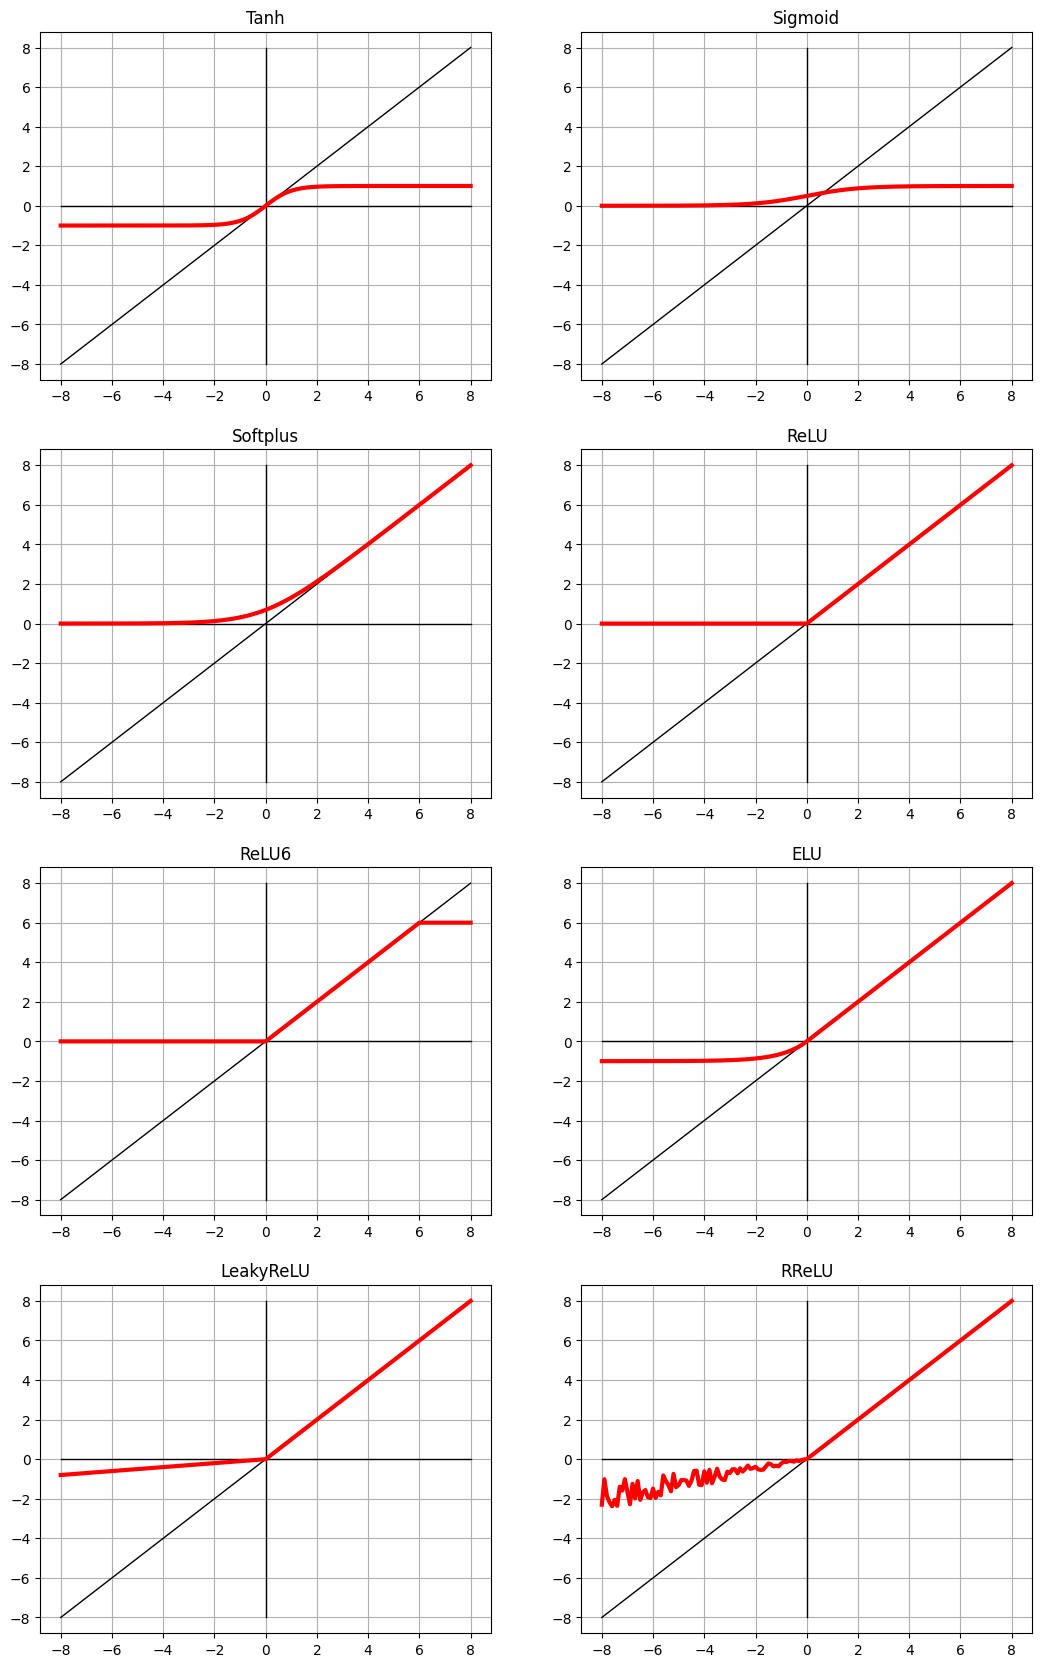

In [19]:
fig, axs = plt.subplots(4, 2)
x = 1280 / fig.dpi  # 가로 길이 (1280 pixel)
y = 2080 / fig.dpi  # 세로 길이 (9960 pixel)
fig.set_figwidth(x)
fig.set_figheight(y)

for idx, activation_func in enumerate(activation_list):
    i, j = divmod(idx, 2)
    axs[i][j].set_title(type(activation_func).__name__)

    output_t = activation_func(input_t)

    axs[i][j].grid()
    axs[i][j].plot(input_t.numpy(), input_t.numpy(), 'k', linewidth=1)
    axs[i][j].plot([-8, 8], [0, 0], 'k', linewidth=1)
    axs[i][j].plot([0, 0], [-8, 8], 'k', linewidth=1)
    axs[i][j].plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

plt.show()